In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import jsonstat

#### ONS Cause of Death Data: Deaths Caused by Dangerous Dogs

This dataset contains the number of deaths registered in England and Wales where the underlying cause of death was due to an injury caused by a dog. Deaths are classified by date of registration not date of death. These data are produced annually by the ONS and categorisation by cause of death uses ICD coding. Data is provided by the UK's Office of National Statistics and is available for download from the Nomis API. 

In [2]:
# Download raw data
url = 'https://www.nomisweb.co.uk/api/v01/dataset/NM_161_1.jsonstat.json?geography=2013265921...2013265930,2013265933&cause_of_death=12354&gender=1...2&age=1...20&measure=1&measures=20100'
url = 'https://www.nomisweb.co.uk/api/v01/dataset/NM_161_1.data.json?geography=2013265921...2013265930,2013265933&cause_of_death=12354&gender=1...2&age=1...20&measure=1&measures=20100'
response = requests.get(url)
raw_json = response.json()

In [3]:
# Process Data

def process_obs(obs):

    output = {}
    for key, item in obs.items():
        if key == 'obs_value':
            obs_value = item['value']
            output[key] = obs_value
        elif key == 'age':
            output['age_desc'] = item['description']
            output['age_code'] = item['value']
        elif type(item) == dict:
            output[key] = item['description']
        else:
            output[key] = item
    
    return output

output = pd.DataFrame([process_obs(obs) for obs in raw_json['obs']])[[
    'geography', 'cause_of_death', 'gender', 'age_desc', 'age_code', 'measure', 'time_format', 'unit','time', 'obs_value']
].copy()

We can review the structure of the data using the output.head() method:

In [4]:
output.head().transpose()

,0,1,2,3,4
geography,North East,North East,North East,North East,North East
cause_of_death,W54 Bitten or struck by dog,W54 Bitten or struck by dog,W54 Bitten or struck by dog,W54 Bitten or struck by dog,W54 Bitten or struck by dog
gender,Male,Male,Male,Male,Male
age_desc,Aged under 1,Aged under 1,Aged under 1,Aged under 1,Aged under 1
age_code,1,1,1,1,1
measure,Deaths,Deaths,Deaths,Deaths,Deaths
time_format,Annual,Annual,Annual,Annual,Annual
unit,Persons,Persons,Persons,Persons,Persons
time,2013,2014,2015,2016,2017
obs_value,0,0,0,0,0


A visualisation of annual death rates shows a substantial rise in the number of deaths registered in 2023, mostly affecting adults:

[]

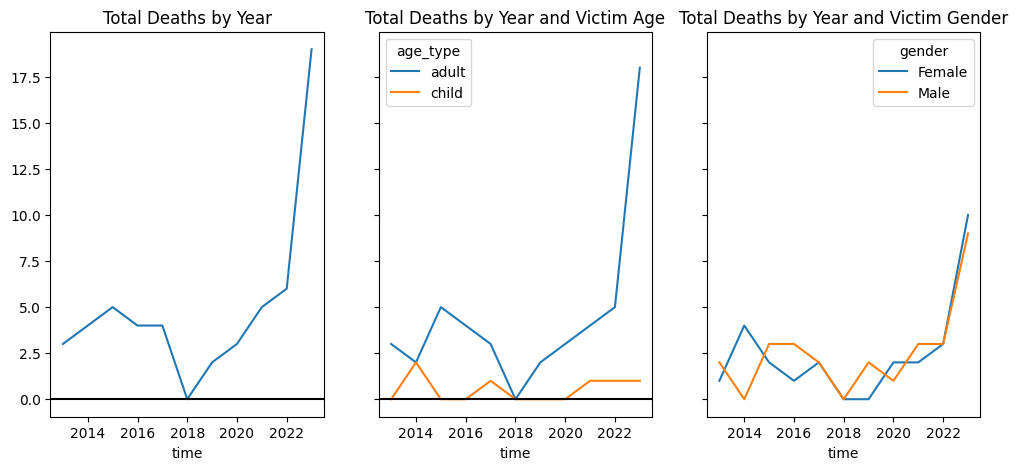

In [5]:
output['age_type'] = np.where(output.age_code<=5, 'child', 'adult')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
output.groupby('time').obs_value.sum().plot(title='Total Deaths by Year', ax=ax1)
output.groupby(['time', 'age_type']).obs_value.sum().unstack().plot(title='Total Deaths by Year and Victim Age', ax=ax2)
output.groupby(['time', 'gender']).obs_value.sum().unstack().plot(title='Total Deaths by Year and Victim Gender', ax=ax3)
ax1.axhline(0, color='k')
ax2.axhline(0, color='k')
plt.plot()

This data enables replication of Tulloch and Westgarth 2021 (https://pubmed.ncbi.nlm.nih.gov/36652787/) for the period 2012-2023.

In [7]:
output.to_csv('dangerous_dog_deaths_ons.csv')